In [2]:
from celluloid import Camera
from IPython.display import HTML
import matplotlib
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip
import pandas as pd

In [3]:
df = pd.read_csv('5_Day_Mean_Incidence_Rate_Per_NY_Zip_Code.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values(by='Timestamp')
min_date = df['Timestamp'].min().date().strftime('%B %d')
max_date = df['Timestamp'].max().date().strftime('%B %d %Y')

t:  13%|█▎        | 2/15 [00:00<00:01, 11.51it/s, now=None]

MoviePy - Building file animation.gif with imageio.


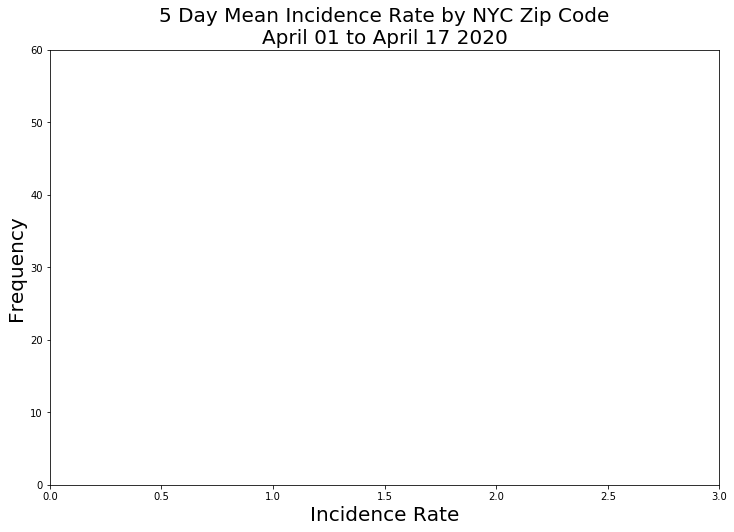

In [4]:
fig = plt.figure(figsize=(12,8))
plt.xlim(0.0, 3.0)
plt.ylim(0, 60)
plt.xlabel('Incidence Rate', fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.title('5 Day Mean Incidence Rate by NYC Zip Code\n' + min_date + ' to ' + max_date, fontsize=20)

camera = Camera(fig)
ax = fig.add_subplot(111)

for by, group in df.groupby(['Timestamp']):
    group[['5 Day Mean Incidence Rate']].plot.hist(by='5 Day Mean Incidence Rate',
                                                   ax=ax,
                                                   color='blue')
    ax.get_legend().remove()
    camera.snap()
animation = camera.animate(interval=2*200)
animation.save('animation.mp4')
#HTML(animation.to_html5_video())

clip = VideoFileClip("animation.mp4")
clip.write_gif("animation.gif")